In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit
import jax
import jaxquantum as jqt
import jax.numpy as jnp
import matplotlib.pyplot as plt

gpu_device = None
try: 
    gpu_device = jax.devices('gpu')[0] 
except:
    print('No GPU device found.')
cpu_device = jax.devices('cpu')[0]

/opt/miniconda3/envs/jax-pypi/lib/python3.12/site-packages/qutip/__init__.py:66: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


No GPU device found.


In [3]:
Na = 200
Nq = 2

a = jqt.destroy(Na) ^ jqt.identity(Nq)
adag = jqt.dag(a)
sigmaz = jqt.identity(Na) ^ jqt.sigmaz()

g_state = jqt.basis(Na, 0) ^ jqt.basis(Nq, 0)
e_state = jqt.basis(Na, 0) ^ jqt.basis(Nq, 1)

def Ht(t):
    g_cd = .01 # [GHz]
    H_g_cd = 1j * g_cd * (adag - a) @ sigmaz
    return H_g_cd

ts = jnp.linspace(0,100,101) # [ns]
c_ops = []
initial_state = g_state

In [4]:
with jax.default_device(cpu_device):
    %timeit -n1 -r1 states = jqt.mesolve(initial_state.to_dm(), ts, c_ops=c_ops, Ht=Ht) 
    %timeit states = jqt.mesolve(initial_state.to_dm(), ts, c_ops=c_ops, Ht=Ht) 

/opt/miniconda3/envs/jax-pypi/lib/python3.12/site-packages/equinox/_jit.py:49: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
  out = fun(*args, **kwargs)


2.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
733 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
if gpu_device:
    with jax.default_device(gpu_device):
        %timeit -n1 -r1 states = jqt.mesolve(initial_state.to_dm(), ts, c_ops=c_ops, Ht=Ht) 
        %timeit states = jqt.mesolve(initial_state.to_dm(), ts, c_ops=c_ops, Ht=Ht) 

/opt/miniconda3/envs/jax-pypi/lib/python3.12/site-packages/equinox/_jit.py:49: UserWarning: Complex dtype support is work in progress, please read https://github.com/patrick-kidger/diffrax/pull/197 and proceed carefully.
  out = fun(*args, **kwargs)


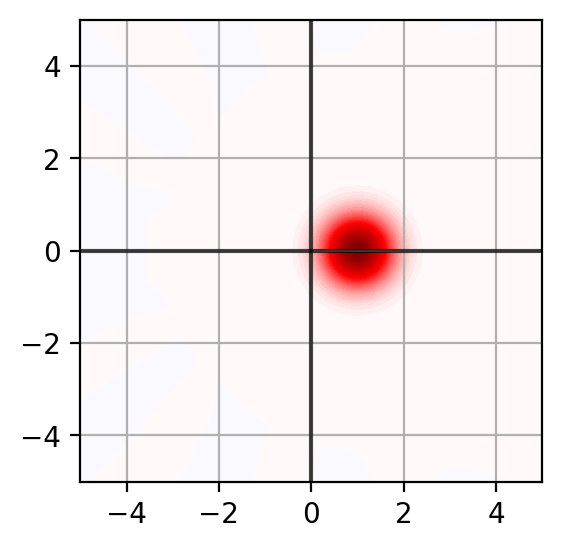

In [6]:
pts = jnp.linspace(-5,5,101)
states = jqt.mesolve(initial_state.to_dm(), ts, c_ops=c_ops, Ht=Ht) 
jqt.plot_wigner(jqt.ptrace(states[-1], 0), pts=pts)